# Εργασία 2 - Δέντρα Απόφασης & Τυχαία Δάση

Ονοματεπώνυμο: Ευθυμιάδης Κωνσταντίνος<br>
ΑΕΜ: 240

## Πρώτο Ερώτημα

### Εισαγωγή Βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Εισαγωγή Δεδομένων

In [2]:
df= pd.read_csv("water_potability.csv")

### Περιγραφή Χαρακτηριστικών

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Δημιουργία Ιστογράμματος για κάθε χαρακτηριστικό

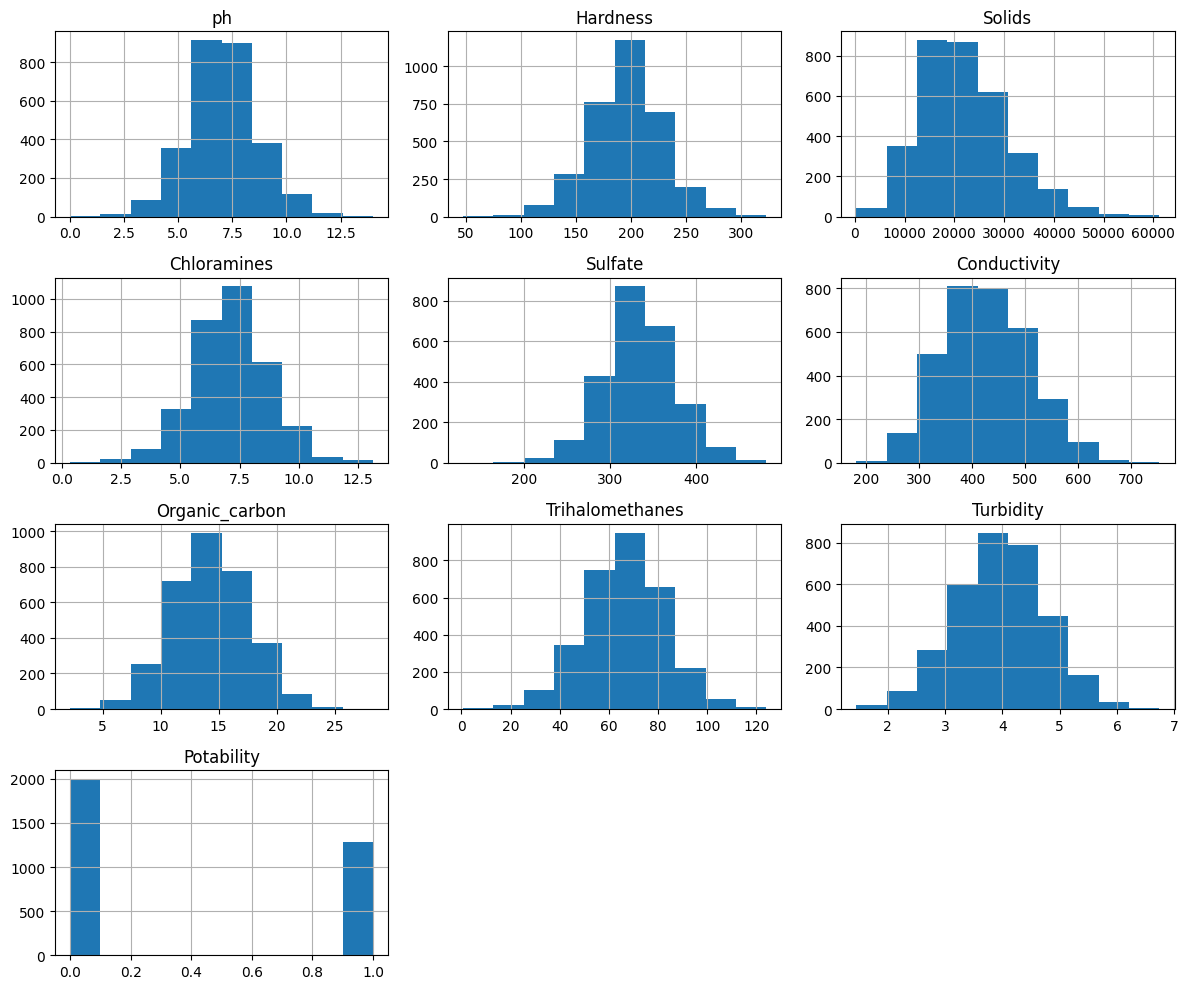

In [4]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

### Δημιουργία Ραβδογράμματος για τη μεταβλητή Potability

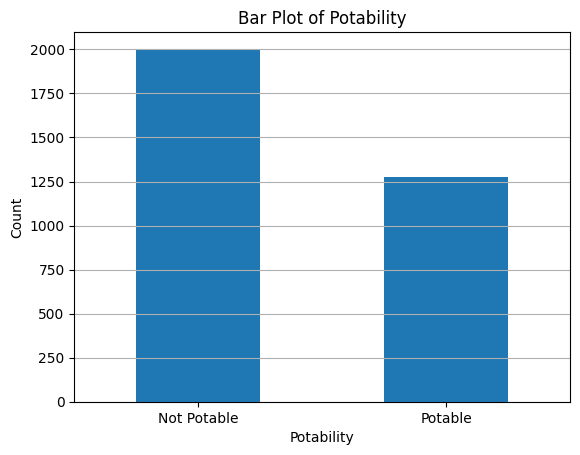

In [5]:
counts_of_0_and_1_at_outcome= df['Potability'].value_counts()
counts_of_0_and_1_at_outcome.plot(kind='bar')

labels = ['Not Potable', 'Potable']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Bar Plot of Potability')
plt.grid(axis='y')
plt.show()

### Εμφάνιση πλήθους ελλειπών τιμών για κάθε χαρακτηριστικό

In [6]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


### Ποσοστά Πόσιμου και μη-Πόσιμου νερού

In [7]:
df['Potability'].value_counts(normalize=True) * 100

,proportion
Potability,
0,60.989011
1,39.010989


Η ποιότητα των δεδομένων είναι γενικά ικανοποιητική. <br>
Τα δεδομένα, ως προς την κατανομή τους στις δύο κατηγορίες (περίπου 60% - 40%), δεν παρουσιάζουν σοβαρή ανισορροπία. <br>
Ως προς τα δείγματα, οι περισσότερες στήλες δεν έχουν καθόλου ελείψεις, ενώ μόνο οι pH (περίπου 15%), Sulfate (περίπου 24%) και Trihalomethanes (περίπου 5%) να παρουσιάζουν σημαντικές ελλείψεις, οι οποίες αν δεν αντιμετωπιστούν σωστά, μπορεί να οδηγήσουν σε λανθασμένα συμπεράσματα

## Δεύτερο Ερώρημα

### Ποσοστά Πόσιμου και Μη-Πόσιμου νερού

In [8]:
total_ph_under_6_5= df[df['ph'] < 6.5].shape[0]
total_ph_over_8_5= df[df['ph'] > 8.5].shape[0]
total_ph_over_6_5_under_8_5 = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)].shape[0]

ph_under_6_5_with_1 = df[(df['ph'] < 6.5) & (df['Potability'] == 1)].shape[0]
ph_over_8_5_with_1 = df[(df['ph'] > 8.5) & (df['Potability'] == 1)].shape[0]
ph_over_6_5_under_8_5_with_1= df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5) & (df['Potability'] == 1)].shape[0]

print("Percentage of Potable Water for:")
print("ph < 6.5: " + str(ph_under_6_5_with_1/total_ph_under_6_5))
print("6.5≤pH≤8.5: " + str(ph_over_6_5_under_8_5_with_1/total_ph_over_6_5_under_8_5))
print("ph > 8.5:: " + str(ph_over_8_5_with_1/total_ph_over_8_5))

print()
print("Percentage of Non-Potable Water for:")
print("ph < 6.5: " + str(1-ph_under_6_5_with_1/total_ph_under_6_5))
print("6.5≤pH≤8.5: " + str(1-ph_over_6_5_under_8_5_with_1/total_ph_over_6_5_under_8_5))
print("ph > 8.5:: " + str(1-ph_over_8_5_with_1/total_ph_over_8_5))

Percentage of Potable Water for:
ph < 6.5: 0.3677685950413223
6.5≤pH≤8.5: 0.43900602409638556
ph > 8.5:: 0.3312883435582822

Percentage of Non-Potable Water for:
ph < 6.5: 0.6322314049586777
6.5≤pH≤8.5: 0.5609939759036144
ph > 8.5:: 0.6687116564417178


Σύμφωνα με τα παραπάνω, διαπιστώνεται ότι:<br>
<ul>
  <li>Για ph < 6.5 </li>
  Το μεγαλύτερο ποσοστό των δειγμάτων είναι μη-πόσιμο (περίπου 63%), κάτι αναμενόμενο με βάση τις οδηγίες του Π.Ο.Υ
  <li>Για ph > 8.5 </li>
  Το μεγαλύτερο ποσοστό των δειγμάτων είναι μη-πόσιμο (περίπου 67%), κάτι αναμενόμενο με βάση τις οδηγίες του Π.Ο.Υ
  <li>Για 6.5≤pH≤8.5 </li>
  Το ποσοστό των δειγμάτων με πόσιμο νερό έχει αυξηθεί συγκριτικά με τις άλλες δύο κατηγορίες (περίπου 44%), όμως εξακολουθεί το μεγαλύτερο ποσοστό των δειγμάτων να είναι μη-πόσιμο. Αυτό σημαίνει ότι υπάρχουν και άλλοι παράγοντες που επηρεάζουν αν το νερό είναι πόσιμο ή όχι
</ul>

Επομένως, γίνεται αντιλειπτό ότι το pH αποτελεί έναν πολύ σημαντικό παράγοντα για την πόσιμη ποιότητα του νερού, αλλά όχι τον μοναδικό

## Τρίτο Ερώτημα

### Δημιουργία Διαγράμματος

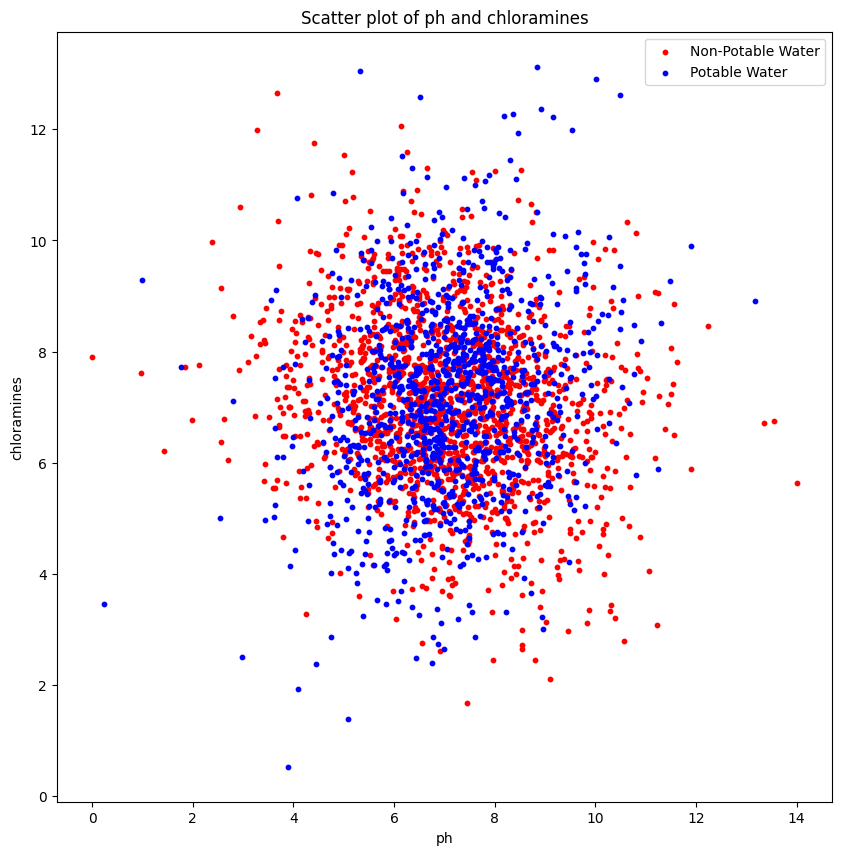

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(df[df['Potability'] == 0]['ph'], df[df['Potability'] == 0]['Chloramines'],
            color='red', label='Non-Potable Water', s=10)

plt.scatter(df[df['Potability'] == 1]['ph'], df[df['Potability'] == 1]['Chloramines'],
            color='blue', label='Potable Water', s=10)

plt.title("Scatter plot of ph and chloramines")
plt.xlabel("ph")
plt.ylabel("chloramines")
plt.legend()
plt.show()

Παρατηρώντας το παραπάνω διάγραμμα, γίνεται αντιληπτό ότι τόσο οι πόσιμες όσο και οι μη-πόσιμες τιμές βρίσκονται σχεδόν σε όλες τις τιμές. Αυτό σημαίνει ότι δεν μπορεί να βγει κάποιο συμπέρασμα εστιάζοντας μόνο σε αυτές τις δύο τιμές.<br>
Παρόλο που ο Π.Ο.Υ. προτείνει επίπεδα χλωραμίνης έως 4ppm, φαίνεται ότι υπάρχουν πάρα πολλά παραδείγματα με χλωραμίνη μεγαλύτερη από 4, τα οποία είναι και αυτά πόσιμα, ενώ υπάρχουν και μη-πόσιμα δείγματα με τιμή μικρότερη από 4pmm.  Αυτό δείχνει, ότι το χαρακτηριστικό χλωραμίνη δεν μπορεί από μόνο του να διαχωρίσει ένα δείγμα σε πόσιμο ή μη-πόσιμο.

## Τέταρτο Ερώτημα

### Συμπλήρωμα ελλειπών τιμών με τη μέση τιμή τους

In [10]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

#### Έλεγχος αν υπάρχουν πλέον ελλειπής τιμές

In [11]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Πέμπτο Ερώτημα

### Μετατροπή DataFrame σε Numpy arrays

In [12]:
input_df= df.drop(columns=['Potability'])
targets_df= df['Potability']

x= input_df.to_numpy()
y= targets_df.to_numpy()

x.shape, y.shape

((3276, 9), (3276,))

### Διαχωρισμός των Δεδομένων σε σύνολα Eκπαίδευσης-Eπικύρωσης

In [13]:
seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

## Έκτο Ερώτημα

### Εκπαίδευση ταξινομητή Decision Tree

In [14]:
decision_tree_clf= DecisionTreeClassifier(random_state=seed)
decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Μέτρηση Ακρίβειας

In [15]:
y_pred_at_test_set= decision_tree_clf.predict(x_test)
y_pred_at_train_set=decision_tree_clf.predict(x_train)

accuracy_at_test_set= accuracy_score(y_test, y_pred_at_test_set)
accuracy_at_test_set= round(accuracy_at_test_set*100, 2)
print("Ακρίβεια στο σύνολο test: " + str(accuracy_at_test_set) + "%")

accuracy_at_train_set= accuracy_score(y_train, y_pred_at_train_set)
accuracy_at_train_set= round(accuracy_at_train_set*100, 2)
print("Ακρίβεια στο σύνολο train: " + str(accuracy_at_train_set) + "%")

Ακρίβεια στο σύνολο test: 57.48%
Ακρίβεια στο σύνολο train: 100.0%


Παρατηρούμε ότι το δέντρο έχει κάνει overfitting στα δεδομένα, αφού για το train set έχει ακρίβεια με ποσοστό 100%, ενώ για το άγνωστο test set έχει μόνο 57.48%.

## Έβδομο Ερώτημα

### Ορισμός Συνδυασμών

In [16]:
criterions= ['gini', 'entropy']
max_depths= [None, 3, 5]
min_samples_splits= [2, 5]
min_samples_leaves= [1, 2]
max_features= [None, 'sqrt']
cost_complexity_prunings= [0, 0.01]

all_the_results= []

### Υπολογισμός Ακρίβειας για κάθε συνδυασμό

In [17]:
for criterion in criterions:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      for min_samples_leaf in min_samples_leaves:
        for max_feature in max_features:
          for cost_complexity_pruning in cost_complexity_prunings:
            decision_tree_clf= DecisionTreeClassifier(criterion= criterion, max_depth= max_depth,
                                                      min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf,
                                                      max_features= max_feature, ccp_alpha= cost_complexity_pruning,
                                                      random_state= seed)
            decision_tree_clf.fit(x_train, y_train)

            y_pred_at_test_set= decision_tree_clf.predict(x_test)
            y_pred_at_train_set= decision_tree_clf.predict(x_train)

            accuracy_at_test_set= accuracy_score(y_test, y_pred_at_test_set)
            accuracy_at_train_set= accuracy_score(y_train, y_pred_at_train_set)

            all_the_results.append({
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_feature,
                'ccp_alpha': cost_complexity_pruning,
                'test_acc': accuracy_at_test_set,
                'train_acc': accuracy_at_train_set
            })



### Δημιουργία DataFrame

In [18]:
df_results = pd.DataFrame(all_the_results)
df_results

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,test_acc,train_acc
0,gini,NaN,2,1,None,0.00,0.574771,1.000000
1,gini,NaN,2,1,None,0.01,0.620549,0.605321
2,gini,NaN,2,1,sqrt,0.00,0.622584,1.000000
3,gini,NaN,2,1,sqrt,0.01,0.620549,0.605321
4,gini,NaN,2,2,None,0.00,0.581892,0.951592
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.626653,0.620148
92,entropy,5.0,5,2,None,0.00,0.655137,0.671173
93,entropy,5.0,5,2,None,0.01,0.626653,0.620148
94,entropy,5.0,5,2,sqrt,0.00,0.620549,0.642826


## Όγδοο Ερώτημα

### Εύρεση μεγαλύτερης ακρίβειας για max-depth=3

In [19]:
df_with_depth_3= df_results[df_results['max_depth'] == 3]
df_with_depth_3_sorted_desc= df_with_depth_3.sort_values(by='test_acc', ascending=False)

best_compination_for_depth_3= df_with_depth_3_sorted_desc.iloc[0]
best_compination_for_depth_3

,72
criterion,entropy
max_depth,3.0
min_samples_split,5
min_samples_leaf,1
max_features,None
ccp_alpha,0.0
test_acc,0.639878
train_acc,0.641082


### Εκπαίδευση Decision Tree για τον παραπάνω συνδυασμό

In [20]:
decision_tree_clf= DecisionTreeClassifier(criterion= best_compination_for_depth_3.criterion,
                                          max_depth= int(best_compination_for_depth_3.max_depth),
                                          min_samples_split= int(best_compination_for_depth_3.min_samples_split),
                                          min_samples_leaf= int(best_compination_for_depth_3.min_samples_leaf),
                                          max_features= best_compination_for_depth_3.max_features,
                                          ccp_alpha= float(best_compination_for_depth_3.ccp_alpha),
                                          random_state= seed)
decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       random_state=0)

### Απεικόνιση Δέντρου

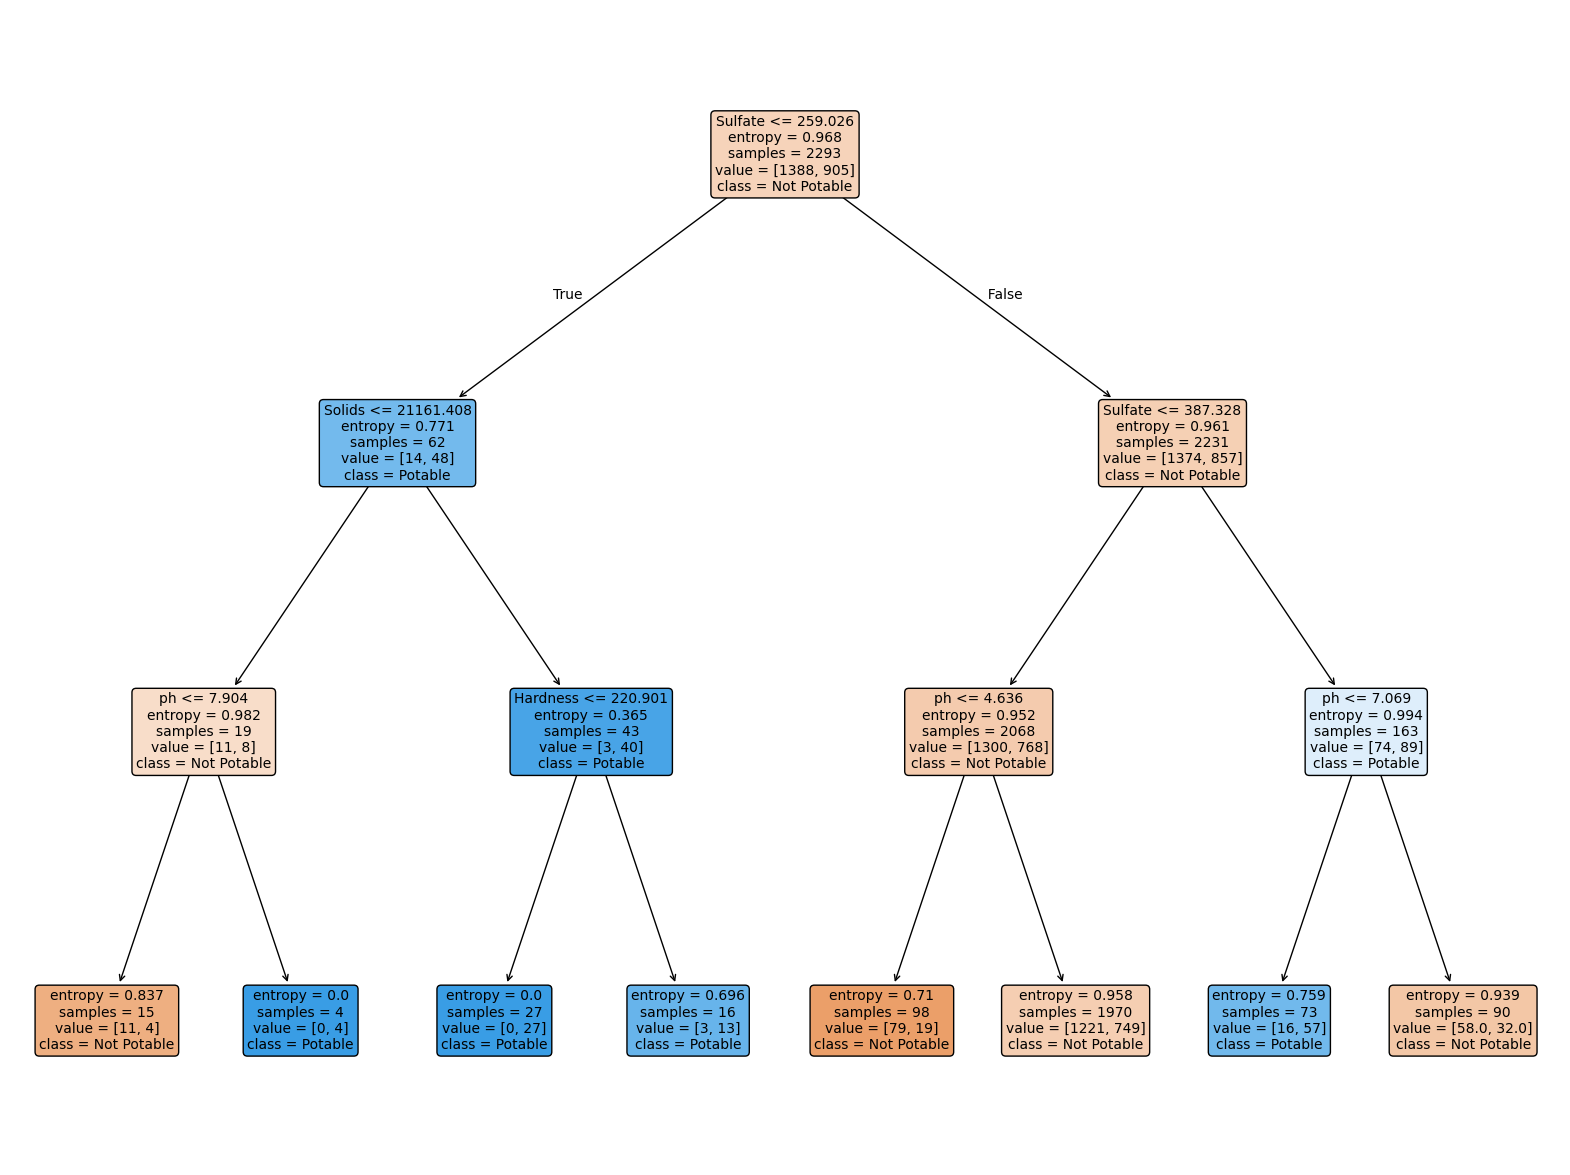

In [21]:
plt.figure(figsize=(20,15))
plot_tree(decision_tree_clf, filled=True, feature_names=df.columns[:-1],
          class_names=['Not Potable', 'Potable'], rounded=True, fontsize=10)
plt.show()

Παρατηρούμε ότι στο δέντρο χρησιμοποιούνται πολλαπλά χαρακτηριστικά (sulfate, solids, ph, hardness), για την κατηγοροποίηση του νερού σε πόσιμο και μη-πόσιμο. <br>
Αρχικά, επιλέχθηκε στην ρίζα του δέντρου ένας κανόνας χρησιμοποιώντας την sulfate. Ο αριθμός των δειγμάτων που φτάνουν από αυτό τον κόμβο είναι 2293, λογικό αφού το train set χρησιμοποιεί το 70% των συνολικών δεδομένων (3276 συνολικά παραδείγματα), επαληθεύοντας ότι δεν υπήρξε κάποιο λάθος κατά την διαδικασία διαχωρισμού των δεδομένων στα train και test set. Ο συγκεκριμένος κόμβος χαρακτηρίζεται ως Not Potable, αφού η πλειοψηφία των δειγμάτων που φτάνουν σε αυτόν τον κόμβο είναι μη-πόσιμα(1388 μη-πόσιμα, 905 πόσιμα)<br>
Παρατηρούμε ότι σε κάθε κόμβο, υπάρχουν τουλάχιστον πάνω από 5 δείγματα που φτάνουν σε κάθε ένα από αυτά.
<br>
Επίσης, εύκολα διακρίνεται ότι το βάθος του δέντρου είναι ίσο με 3. Αυτό συνέβει λόγω του περιορισμού που τέθηκε (max_depth=3). Παρατηρούμε, ότι υπάρχουν τερματικά φύλλα με entropy διαφορετικό του 0, πράγμα που υποδηλώνει ότι υπάρχουν περιορισμοί στο συγκεκριμένο φύλλο

## Ένατο και Δέκατο Ερώτημα

### Εύρεση Μεγαλύτερης Ακρίβειας

In [22]:
best_test_acc_df= df_results.sort_values(by='test_acc', ascending=False)

best_compination_for_best_test_acc= best_test_acc_df.iloc[0]
best_compination_for_best_test_acc

,92
criterion,entropy
max_depth,5.0
min_samples_split,5
min_samples_leaf,2
max_features,None
ccp_alpha,0.0
test_acc,0.655137
train_acc,0.671173


### Εκπαίδευση Decision Tree για τον παραπάνω συνδυασμό

In [23]:
decision_tree_clf= DecisionTreeClassifier(criterion= best_compination_for_best_test_acc.criterion,
                                          max_depth= int(best_compination_for_best_test_acc.max_depth),
                                          min_samples_split= int(best_compination_for_best_test_acc.min_samples_split),
                                          min_samples_leaf= int(best_compination_for_best_test_acc.min_samples_leaf),
                                          max_features= best_compination_for_best_test_acc.max_features,
                                          ccp_alpha= float(best_compination_for_best_test_acc.ccp_alpha),
                                          random_state= seed)
decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)

### Σημαντικότητα για κάθε χαρακτηριστικό

In [24]:
feature_importances = decision_tree_clf.feature_importances_
features_names = input_df.columns

### Σχεδίαση Ραβδογράμματος

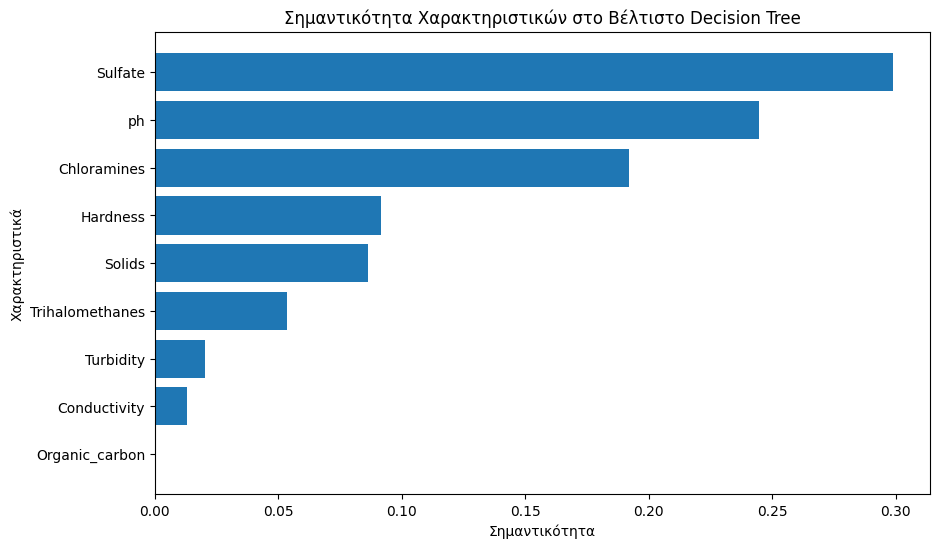

In [25]:
indices = np.argsort(feature_importances)[::-1]
feature_importances_sorted = feature_importances[indices]
features_sorted = features_names[indices]

plt.figure(figsize=(10, 6))
plt.barh(features_sorted, feature_importances_sorted)
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά')
plt.title('Σημαντικότητα Χαρακτηριστικών στο Βέλτιστο Decision Tree')
plt.gca().invert_yaxis()
plt.show()

Αν η συσκευή μπορεί να υποστηρίζει μέχρι 5 χημικές αναλύσεις, λόγω του ότι τα πιο σημαντικά χαρακτηριστικά έχουν τη μεγαλύτερη επιρροή στην απόφαση του δέντρου θα έπρεπε να επιλέγονταν τα πέντε πιο σημαντικά χαρακτηριστικά από το πάνω ραβδόγραμμα, δηλαδή τα:<br>
<ul>
  <li>Sulfate</li>
  <li>ph</li>
  <li>Chloramines</li>
  <li>Hardness</li>
  <li>solids</li>
</ul>

## Ενδέκατο Ερώτημα

Ένα Τυχαίο Δάσος συνήθως πετυχαίνει καλύτερη ακρίβεια από ένα Δέντρο Απόφασης, διότι βασίζεται στον συνδυασμό πολλών δέντρων τα οποία εκπαιδεύονται σε διαφορετικά υποσύνολα δεδομένων, μειώνοντας με αυτό τον τρόπο το φαινόμενο της υπερπροσαρμογής. Επιπλέον θετικό της τυχαιότητας στην επιλογή των χαρακτηριστικών που χρησιμοποιεί ένα Τυχαίο Δάσος είναι η δημιουργία ενός μοντέλου, λιγότερο ευαίσθητο στους διάφορους θορύβους που μπορεί να έχουν τα δείγματα.

## Δωδέκατο Ερώτημα

### Εκπαίδευση Random Forest

In [26]:
seed=0
random_forest_clf= RandomForestClassifier(random_state=seed)
random_forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

### Εύρεση Ακρίβειας

In [27]:
y_pred_at_test_set= random_forest_clf.predict(x_test)
y_pred_at_train_set= random_forest_clf.predict(x_train)

accuracy_at_test_set= accuracy_score(y_test, y_pred_at_test_set)
accuracy_at_test_set= round(accuracy_at_test_set*100, 2)
print("Ακρίβεια στο σύνολο test: " + str(accuracy_at_test_set) + "%")

accuracy_at_train_set= accuracy_score(y_train, y_pred_at_train_set)
accuracy_at_train_set= round(accuracy_at_train_set*100, 2)
print("Ακρίβεια στο σύνολο train: " + str(accuracy_at_train_set) + "%")

Ακρίβεια στο σύνολο test: 69.79%
Ακρίβεια στο σύνολο train: 100.0%


In [28]:
n_estimators= [50, 100, 200]
criterions= ['gini', 'entropy']
max_depths= [None, 3, 5]
min_samples_splits= [2, 5]
min_samples_leaves= [1, 2]
max_features= [None, 'sqrt']
cost_complexity_prunings= [0, 0.01]

all_the_results= []

### Υπολογισμός Ακρίβειας για κάθε συνδυασμό

In [29]:
for n_estimator in n_estimators:
  for criterion in criterions:
    for max_depth in max_depths:
      for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
          for max_feature in max_features:
            for cost_complexity_pruning in cost_complexity_prunings:
              random_forest_clf= RandomForestClassifier(criterion= criterion,
                                                        max_depth= max_depth,
                                                        min_samples_split= min_samples_split,
                                                        min_samples_leaf= min_samples_leaf,
                                                        max_features= max_feature,
                                                        ccp_alpha= cost_complexity_pruning,
                                                        n_estimators= n_estimator,
                                                        random_state= seed)

              random_forest_clf.fit(x_train, y_train)

              y_pred_at_test_set= random_forest_clf.predict(x_test)
              y_pred_at_train_set= random_forest_clf.predict(x_train)

              accuracy_at_test_set= accuracy_score(y_test, y_pred_at_test_set)
              accuracy_at_train_set= accuracy_score(y_train, y_pred_at_train_set)

              all_the_results.append({
                'n_estimatos': n_estimator,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_feature,
                'ccp_alpha': cost_complexity_pruning,
                'test_acc': accuracy_at_test_set,
                'train_acc': accuracy_at_train_set
            })



### Δημιουργία DataFrame

In [30]:
df_results = pd.DataFrame(all_the_results)
df_results

,n_estimatos,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,test_acc,train_acc
0,50,gini,NaN,2,1,None,0.00,0.672431,1.000000
1,50,gini,NaN,2,1,None,0.01,0.626653,0.619712
2,50,gini,NaN,2,1,sqrt,0.00,0.693795,1.000000
3,50,gini,NaN,2,1,sqrt,0.01,0.620549,0.605321
4,50,gini,NaN,2,2,None,0.00,0.669379,0.997819
...,...,...,...,...,...,...,...,...,...
283,200,entropy,5.0,5,1,sqrt,0.01,0.628688,0.624509
284,200,entropy,5.0,5,2,None,0.00,0.660224,0.695159
285,200,entropy,5.0,5,2,None,0.01,0.646999,0.646751
286,200,entropy,5.0,5,2,sqrt,0.00,0.648016,0.682948


## Δέκατο Τρίτο Ερώτημα

Το πιο σημαντικό για ένα μοντέλο είναι να προβλέπει καλύτερα το μη-πόσιμο νερό, χάνοντας ακρίβεια από το πόσιμο. <br>
Αν το μοντέλο, προβλέπει κάποιο νερό ως πόσιμο, ενώ στην πραγματικότητα αυτό δεν είναι, τότε υπάρχει μεγάλη πιθανότητα να θέσει την χωή των καταναλωτών σε κίνδυνο. <br>
Από την άλλη, το να δείχνει ένα πόσιμο νερό, ως μη-πόσιμο θα έχει επιπτώσεις κυρίως στο οικονομικό κομμάτι, αλλά τουλάχιστον δεν θα διατρέχουν κίνδυνο οι καταναλωτές

## Δέκατο Τέταρτο Ερώτημα

Από νομικής άποψης, η χρήση του καλύτερου Decision Tree αποτελεί ασφαλέστερη επιλογή από αυτήν της χρήσης ενός Random Forest. <br>
Το Random Forest, παρόλου που μειώνει την υπερπροσαρμογή και έχει καλύτερη αντοχή στους θορύβους, λόγω της δυσκολίας του στην εξηγησιμότητα του αποτελέσματος το καθιστά ως λιγότερο ασφαλή επιλογή από νομικής πλευράς. Σε περίπτωση σημαντικού λάθους, υπάρχει ο κίνδυνος να μην μπορεί να εξηγηθεί η συλλογιστική που ακολουθήθηκε, και το μοντέλο έλαβε κάποια, ενδεχομένως, μοιραία απόφαση. <br>
Από την άλλη πλευρά, το Decision Tree βασίζεται σε απλούς κανόνες if-else, κάνοντάς το εύκολα ερμηνεύσιμο, επιτρέποντας να εξηγηθεί με σαφήνεια πώς λήφθηκε η κάθε απόφαση του μοντέλου